# DA623 Tutorial
## Topic: Demystifying 1D convolution
Submission by: 
**VISHAL BULCHANDANI(Roll no. 200101108)**

B.Tech.(Computer Science and Engineering)



In [72]:
import numpy as np
import scipy
import plotly
import matplotlib.pyplot as plt
import pandas as pd
import IPython.display as display
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


# A Probability Problem:
To introduce convolution we take a simple problem in probability:
We take a balanced die. Probability distribution of the number rolled is as follows:

| X    | 1   | 2   | 3   | 4   | 5   | 6   |
|------|-----|-----|-----|-----|-----|-----|
| p(X) | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 |

Now suppose we are rolling 2 dies:

We need to find the probability distribution of sum of the results:

We can do it via a 2D table:
| X | 1    | 2    | 3    | 4    | 5    | 6    |
|---|------|------|------|------|------|------|
| 1 | 1/36 | 1/36 | 1/36 | 1/36 | 1/36 | 1/36 |
| 2 | 1/36 | 1/36 | 1/36 | 1/36 | 1/36 | 1/36 |
| 3 | 1/36 | 1/36 | 1/36 | 1/36 | 1/36 | 1/36 |
| 4 | 1/36 | 1/36 | 1/36 | 1/36 | 1/36 | 1/36 |
| 5 | 1/36 | 1/36 | 1/36 | 1/36 | 1/36 | 1/36 |
| 6 | 1/36 | 1/36 | 1/36 | 1/36 | 1/36 | 1/36 |

and the distribution is:
| X      | 2    | 3    | 4    | 5    | 6    | 7    | 8    | 9    | 10   | 11   | 12   |
|--------|------|------|------|------|------|------|------|------|------|------|------|
| p(sum) | 1/36 | 2/36 | 3/36 | 4/36 | 5/36 | 6/36 | 5/36 | 4/36 | 3/36 | 2/36 | 1/36 |

one of the ways in which this could be generated is:
take 2 dices A and B and revert the probability distribution of A:
and calculate using a sliding window:

| A    | 1    | 2    | 3    | 4    | 5    | 6    |      |      |      |      |      |
|------|------|------|------|------|------|------|------|------|------|------|------|
| p(A) | 1/36 | 1/36 | 1/36 | 1/36 | 1/36 | 1/36 |      |      |      |      |      |
| B    |      |      |      |      |      | 6    | 5    | 4    | 3    | 2    | 1    |
| p(B) |      |      |      |      |      | 1/36 | 1/36 | 1/36 | 1/36 | 1/36 | 1/36 |

Here we slide the B distribution to the right and multiply the coinciding rows and add the columns to get the probability:
$$
P(6+6) = \frac{1}{6} \times \frac{1}{6} 
$$

| A    | 1    | 2    | 3    | 4    | 5    | 6    |      |      |      |      |   |
|------|------|------|------|------|------|------|------|------|------|------|---|
| p(A) | 1/36 | 1/36 | 1/36 | 1/36 | 1/36 | 1/36 |      |      |      |      |   |
| B    |      |      |      |      | 6    | 5    | 4    | 3    | 2    | 1    |   |
| p(B) |      |      |      |      | 1/36 | 1/36 | 1/36 | 1/36 | 1/36 | 1/36 |   |

$$
P(5+6) = \frac{1}{6} \times \frac{1}{6}  +  \frac{1}{6} \times \frac{1}{6} = \frac{2}{36}
$$

| A    | 1    | 2    | 3    | 4    | 5    | 6    |      |      |      |   |   |
|------|------|------|------|------|------|------|------|------|------|---|---|
| p(A) | 1/36 | 1/36 | 1/36 | 1/36 | 1/36 | 1/36 |      |      |      |   |   |
| B    |      |      |      | 6    | 5    | 4    | 3    | 2    | 1    |   |   |
| p(B) |      |      |      | 1/36 | 1/36 | 1/36 | 1/36 | 1/36 | 1/36 |   |   |

$$
P(10) = \frac{1}{6} \times \frac{1}{6}  +  \frac{1}{6} \times \frac{1}{6} + \frac{1}{6} \times \frac{1}{6}= \frac{3}{36}
$$


and so on...
to calculate each of the probability.

Observe that we here we revert the array of probability and then use it as a sliding window to calculate the results.
This operation is observed in many places in mathematics and is called a **convolution**.


### What is convolution:
Take arrays A and B:

$$
\begin{split}
A & = [a_1,a_2,a_3,\ldots, a_m] \\
B & = [b_1,b_2,b_3, \ldots, b_n]
\end{split}


$$
Convolution of A and B is defined by taking the reverse of array A and then sliding it across B and calculating the sum of products.

$$
(A * B)[n] = \sum_{m=0}^{M-1} A[m] \cdot B[n - m]

$$

where $M = N_A+N_B-1$



In **Python** we have two ways of calculating the convolution of arrays:
```
1. np.convolve()
2. scipy.signals.fftconvolve()

Take the previous probability problem with a weighted dice. The probabilities are shown below:

| X    | 1   | 2   | 3   | 4   | 5   | 6   |
|------|-----|-----|-----|-----|-----|-----|
| p(X) | 0.21 | 0.24 | 0.10 | 0.15 | 0.17 | 0.13 |

We calculate the probability of sum using both convolution and the normal methods.

In [34]:
probs = np.array([0.21,0.24,0.10,0.15,0.17,0.13])

dict= {}
for i in range(len(probs)):
    for j in range(len(probs)):
        if (i+j+2) in dict:
            dict[i+j+2]+=probs[i]*probs[j]
        else:
            dict[i+j+2]=probs[i]*probs[j]



con=np.convolve(probs, probs)

for key, new_prob in zip(dict.keys(), con):
    print(f"{key:-6d}   {dict[key]:.5f}    {new_prob:.5f}")


     2   0.04410    0.04410
     3   0.10080    0.10080
     4   0.09960    0.09960
     5   0.11100    0.11100
     6   0.15340    0.15340
     7   0.16620    0.16620
     8   0.11890    0.11890
     9   0.07700    0.07700
    10   0.06790    0.06790
    11   0.04420    0.04420
    12   0.01690    0.01690


As you can see the convolution function values match the value of the probabilities desired. 
In general in fact for 2 random variables: $X$ and $Y$
if their probability distribution functions are of form $$P(X) , P(Y)$$
Then the probability distribution of $X+Y$ is given as:
$$
P(X+Y) = P(X) * P(Y)
$$
where * represents convolution.

Now lets see a simple example of convolution:


In [35]:
A = [1,2]
B= [3,4,5]

print(np.convolve(A,B))
print(scipy.signal.fftconvolve(A,B))

[ 3 10 13 10]
[ 3. 10. 13. 10.]


now as we mentioned, there are 2 ways of calculating convolution in Python:

1. np.convolve()
2. scipy.signal.fftconvolve()

Both give identical outputs but there is a difference

Let us see the difference between them.

In [41]:
A = np.random.randn(10000)
B = np.random.randn(10000)

# we time both the functions
%timeit np.convolve(A,B)
%timeit scipy.signal.fftconvolve(A,B)


37.1 ms ± 151 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.26 ms ± 14 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


As you can see there is huge difference between the speed of both the functions despite them calculating the same thing. 
This is because the np.convolve function calculates the convolution by simple elemental multiplication which has a time complexity of $$ O(n^2) $$.
WHereas the scipy.signal.fftconvolve uses the Fast Fourier Transform algorithm to calculate the convolution and has a time complexity of: $$ O(n.log(n)) $$

### Polynomial Multiplication
It is very easy to visualize convolution as a sort of polynomial multiplication.

Take example: 

$$
\begin{split} 
p(x) &= x+5 \\
q(x) &= x^2+5x+6 \\
p(x)q(x) &= (x+5) (x^2+5x+6) \\
&= x^3 + 10x^2 + 31x +30
\end{split}
$$

observe that 
A=[1,5]
B=[1,5,6]

then np.convolve(A,B) gives us the coefficients of the polynomial multiplication. 
This is used in the fftconvolve function to calculate the convolution via calculating the polynomial product through DFT.

In [37]:
A=[1,5]
B=[1,5,6]
print(np.convolve(A,B))

[ 1 10 31 30]


### Convolution of functions:
Convolution of continuous functions $f_1(t)$ and $f_2(t)$ is defined as:
$$
(f_1*f_2)(t) = \int_{-\infty}^{\infty}f_1(\tau)f_2(t-\tau)d\tau.
$$

Below f1 is the triangle function and f2 is the exponential function in the postive +x axis

In [38]:
f1 = lambda t: np.maximum(0, 1-abs(t))
f2 = lambda t: (t>0) * np.exp(-2*t)

In [39]:
Fs = 50  # our sampling frequency for the plotting
T = 5    # the time range we are interested in
t = np.arange(-T, T, 1/Fs)  # the time samples

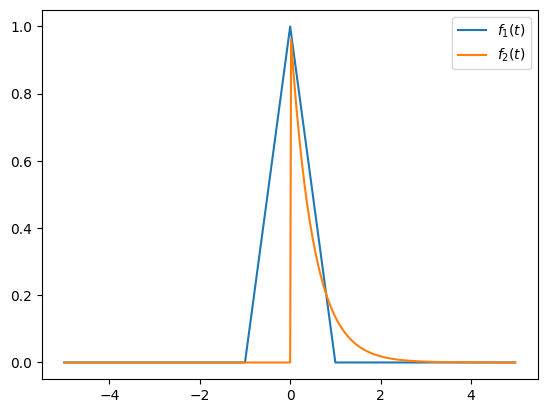

In [43]:
plt.plot(t, f1(t), label='$f_1(t)$')
plt.plot(t, f2(t), label='$f_2(t)$')
plt.legend()

Use the slider below in the figure to find out the convolution at a particular point


In [77]:


def print_convolution_point(t0,f2,f1):
    
    flipped = lambda tau: f2(t0-tau)
    product = lambda tau: f1(tau)*f2(t0-tau)
    
    plt.figure(figsize=(8,3))
    plt.plot(t, f1(t), label=r'$f_1(\tau)$')
    plt.plot(t, flipped(t), label=r'$f_2(t_0-\tau)$')
    plt.plot(t, product(t), label=r'$f_1(\tau)f_2(t_0-\tau)$',color='red')
    plt.fill_between(t,product(t),color='#ff000070')
    plt.legend()
    # Explicitely calculate the integral, using the Simpson integration rule
    display.display(display.HTML(f"Result of the convolution (red shaded area):  {scipy.integrate.simpson(product(t), x=t):.3f}" ))

interact(print_convolution_point,t0=widgets.FloatSlider(value=7.5,
    min=-5,
    max=5.0,
    step=0.05,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
), f1=fixed(f1), f2=fixed(f2));


interactive(children=(FloatSlider(value=5.0, continuous_update=False, description='Test:', max=5.0, min=-5.0, …

In [83]:

def showConvolution(t0,f1, f2):
    # Calculate the overall convolution result using Simpson integration
    convolution = np.zeros(len(t))
    for n, t_ in enumerate(t):
        prod = lambda tau: f1(tau) * f2(t_-tau)
        convolution[n] = scipy.integrate.simps(prod(t), t)

    # Create the shifted and flipped function
    f_shift = lambda t: f2(t0-t)
    prod = lambda tau: f1(tau) * f2(t0-tau)

    # Plot the curves
    axes[0].clear() # il
    axes[1].clear()
    
    axes[0].set_xlim(-5, 5)
    axes[0].set_ylim(0, 1.0)
    #axes[0].set_ymargin(0.05) # il
    axes[0].plot(t, f1(t), label=r'$f_1(\tau)$')
    axes[0].plot(t, f_shift(t), label=r'$f_2(t_0-\tau)$')
    #axes[0].fill(t, prod(t), color='r', alpha=0.5, edgecolor='black', hatch='//') # il
    axes[0].plot(t, prod(t), 'r-', label=r'$f_1(\tau)f_2(t_0-\tau)$')
    #axes[0].grid(True); axes[0].set_xlabel(r'$\tau$'); axes[0].set_ylabel(r'$x(\tau)$') # il
    #axes[0].legend(fontsize=10) # il
    #axes[0].text(-4, 0.6, '$t_0=%.2f$' % t0, bbox=dict(fc='white')) # il

    # plot the convolution curve
    axes[1].set_xlim(-5, 5)
    axes[1].set_ylim(0, 0.4)
    #axes[1].set_ymargin(0.05) # il
    axes[1].plot(t, convolution, label='$(f_1*f_2)(t)$')

    # recalculate the value of the convolution integral at the current time-shift t0
    current_value = scipy.integrate.simps(prod(t), t)
    axes[1].plot(t0, current_value, 'ro')  # plot the point
    #axes[1].grid(True); axes[1].set_xlabel('$t$'); axes[1].set_ylabel('$(f_1*f_2)(t)$') # il
    #axes[1].legend(fontsize=10) # il
    #plt.show() # il

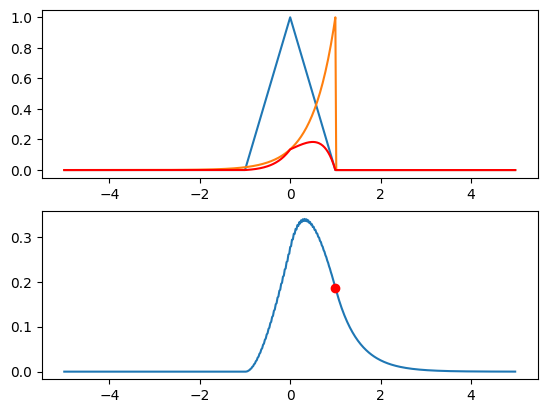

In [84]:
showConvolution(f1,f2,1)